# 중간고사 : 토픽모형 개인별 연구 프로젝트 결과 제출


특정 관심 주제에 대하여 7주차 토픽분석 사례를 참조하여 이와 유사하게 5단계를 거치면서 5가지 요구사항을 포함하여 관심 분야에 대한 자료를 수집/분석하여, 토픽분석 결과를 제시하면서 해당 코드에 대한 설명과 분석결과에 대한 설명을 추가하여  10페이지 이내의 분석 결과 보고서와 코드를 제출하세요.

제출기한 : 11월 5일한

제출내용 : 1. 한글 문서의 분석결과보고서 본인의 이름으로 파일명 부여 : 김강남.hwp

                 2. 파이썬 코드 : 김강남.ipynb (참고 확인용)

*** 중요 : 내용이 다소 미흡해도 제한된 기한내에 반드시~~ 꼭 꼭 제출해주세요!!!

5가지 요구사항 :

1. 웹크롤링을 통하여 관심주제에 대한 데이터를 수집하고 수집한 내용과 코드 설명을 병행하여 제시하세요



* ** 기본적으로 새로운 분야에 대한 크롤링을 권장하지만 크롤링에 자신이 없는 경우 너무 많이 고민하지 마세요. 자신없으면 아래의 샘플(채만식: 종로의 주민)을 참조하여 비슷한 사이트의 한국 소설 내용 몇개를 크롤링해서 몇개의 소설을 비교하는 토픽 분석을 하셔도 됩니다.***

참조 웹페이지 : https://ko.wikisource.org/wiki/위키문헌:공유마당에_등록된_문서_목록



from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import pandas as pd
html = urlopen('https://ko.wikisource.org/wiki/%EC%A2%85%EB%A1%9C%EC%9D%98_%EC%A3%BC%EB%AF%BC')
soup = bs(html, "html.parser")
print(soup.find('div', {'class' :'mw-parser-output'}).get_text())

2. Konlpy 또는 정규표현식(re) 라이브러리를 이용하여 위에서 수집한 택스트 데이터에 대하여 전처리를 하고 적용한 절차와 코드를 설명하세요.

3. 2항의 전처리 결과를 문서별 코퍼스와 토큰화하여 DTM, TF-IDF에 의한 대략적인 토픽을 탐색하고 결과를 설명하세요.

4. 전처리 결과를 이용하여 Gensim 라이브러리의 LDA 모형을 적합시키고 문서별 키워드와 토픽별 키워드를 정리하여 제시하세요.

5. 위에서 분석한 토픽들을 토픽별 키워드의 빈도수와 중요도를 비교해서 볼 수 있는 시각화방법으로 Matplotlib, wordcloud, pyLDAvis 라이브러리 등을 이용하여 시각화하여 제시하고 설명하세요.  

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import pandas as pd

In [ ]:
docs = []
doc = []

In [ ]:
html = urlopen('https://www.yonhapnewstv.co.kr/news/MYH20211103022800641')
soup = bs(html, "html.parser")
text = soup.find('div', {'class' :'detail'}).get_text()
text_ = ''

for i in text :
  text_ = text_ + i
  if i == '.':
    doc.append(text_)
    text_ = ''

docs.insert(0, doc)
doc = []

print(docs)

[["\n\n\n\n닫기\n\n\n\n\r\n\t\t\t\t\t\t위드코로나 기대 속…백신패스 일부 업종 반발[앵커]단계적 일상회복 '위드 코로나' 시작으로 거리 곳곳에서는 모처럼 기대감이 감돌고 있는데요.", '하지만 헬스장 등 백신 패스가 적용된 몇몇 업종에서는 추가 타격이 예상된다며 크게 반발하고 있습니다.', '홍정원 기자입니다.', '[기자]군복 차림의 사람들 손에는 장난감 총이 들렸습니다.', '<현장음> "실내체육시설 사업주에게 조준.', ' 일제 격발.', '"시위에 나선 사람들은 헬스장이나 요가, 필라테스 업주들입니다.', '<박정수 / 운동강사> "실내체육시설이 탄압받는 것에 대해 불만을 표출하고자 이렇게 군복을 입고 퍼포먼스를 했습니다.', '"백신 패스에 반발해 거리로 나온 겁니다.', '<현장음> "(백신패스 집어치워라)집어치워라, 집어치워라.', '"정부는 위드 코로나를 시행하면서, 일부 고위험시설에 대해선 백신 증명서나, 음성 확인서를 제출해야만 출입할 수 있도록 하는 \'백신패스제\' 도입했습니다.', '이들은 방역 조치가 완화된 다른 업종과 비교해 상대적 박탈감을 호소했습니다.', '<김가희 / 여성전문피트니스 대표> "정부의 방역 정책, 업종 분류 기준은 도대체 무엇입니까?"<강기영 / 요가비상대책위원장> "마스크를 벗고 밥 먹고 술 먹고 커피 마시는 공간보다 위험하다는 과학적인 근거는 도대체 어디에 있습니까?"노래연습장이나 유흥시설, 목욕탕 등 백신패스가 적용된 다른 업종도 사정은 마찬가지입니다.', '특히 백신 접종률이 낮은 10대 이용객이 많은 노래연습장은 타격이 클 것으로 예상됩니다.', '정부는 감염 확산을 막기 위해 불가피한 일시적인 조치라는 입장입니다.', '<손영래 / 중앙재난안전대책본부 사회전략반장> "이런 방역패스는 단계적으로 해제해나갈 예정입니다.', '"실내체육업 종사자들은 조만간 국가를 상대로 집단 소송에도 나설 방침이어서 백신 패스를 둘러싼 논란은 한동안 계속될 것으로 보입니다.', '연합뉴스TV 홍정원

In [ ]:
html = urlopen('https://m.hankookilbo.com/News/Read/A2021110116010003635')
soup = bs(html, "html.parser")
text = soup.find('p', {'class' :'editor-p'}).get_text()

for i in text :
  text_ = text_ + i
  if i == '.':
    doc.append(text_)
    text_ = ''

docs.insert(1, doc)
doc = []

print(docs)

[["\n\n\n\n닫기\n\n\n\n\r\n\t\t\t\t\t\t위드코로나 기대 속…백신패스 일부 업종 반발[앵커]단계적 일상회복 '위드 코로나' 시작으로 거리 곳곳에서는 모처럼 기대감이 감돌고 있는데요.", '하지만 헬스장 등 백신 패스가 적용된 몇몇 업종에서는 추가 타격이 예상된다며 크게 반발하고 있습니다.', '홍정원 기자입니다.', '[기자]군복 차림의 사람들 손에는 장난감 총이 들렸습니다.', '<현장음> "실내체육시설 사업주에게 조준.', ' 일제 격발.', '"시위에 나선 사람들은 헬스장이나 요가, 필라테스 업주들입니다.', '<박정수 / 운동강사> "실내체육시설이 탄압받는 것에 대해 불만을 표출하고자 이렇게 군복을 입고 퍼포먼스를 했습니다.', '"백신 패스에 반발해 거리로 나온 겁니다.', '<현장음> "(백신패스 집어치워라)집어치워라, 집어치워라.', '"정부는 위드 코로나를 시행하면서, 일부 고위험시설에 대해선 백신 증명서나, 음성 확인서를 제출해야만 출입할 수 있도록 하는 \'백신패스제\' 도입했습니다.', '이들은 방역 조치가 완화된 다른 업종과 비교해 상대적 박탈감을 호소했습니다.', '<김가희 / 여성전문피트니스 대표> "정부의 방역 정책, 업종 분류 기준은 도대체 무엇입니까?"<강기영 / 요가비상대책위원장> "마스크를 벗고 밥 먹고 술 먹고 커피 마시는 공간보다 위험하다는 과학적인 근거는 도대체 어디에 있습니까?"노래연습장이나 유흥시설, 목욕탕 등 백신패스가 적용된 다른 업종도 사정은 마찬가지입니다.', '특히 백신 접종률이 낮은 10대 이용객이 많은 노래연습장은 타격이 클 것으로 예상됩니다.', '정부는 감염 확산을 막기 위해 불가피한 일시적인 조치라는 입장입니다.', '<손영래 / 중앙재난안전대책본부 사회전략반장> "이런 방역패스는 단계적으로 해제해나갈 예정입니다.', '"실내체육업 종사자들은 조만간 국가를 상대로 집단 소송에도 나설 방침이어서 백신 패스를 둘러싼 논란은 한동안 계속될 것으로 보입니다.', '연합뉴스TV 홍정원

In [ ]:
html = urlopen('https://news.kbs.co.kr/news/view.do?ncd=5313740')
soup = bs(html, "html.parser")
text = soup.find('div', {'class' :'view_con_text'}).get_text()

for i in text :
  text_ = text_ + i
  if i == '.':
    doc.append(text_)
    text_ = ''

docs.insert(2, doc)
doc = []

print(docs)

[["\n\n\n\n닫기\n\n\n\n\r\n\t\t\t\t\t\t위드코로나 기대 속…백신패스 일부 업종 반발[앵커]단계적 일상회복 '위드 코로나' 시작으로 거리 곳곳에서는 모처럼 기대감이 감돌고 있는데요.", '하지만 헬스장 등 백신 패스가 적용된 몇몇 업종에서는 추가 타격이 예상된다며 크게 반발하고 있습니다.', '홍정원 기자입니다.', '[기자]군복 차림의 사람들 손에는 장난감 총이 들렸습니다.', '<현장음> "실내체육시설 사업주에게 조준.', ' 일제 격발.', '"시위에 나선 사람들은 헬스장이나 요가, 필라테스 업주들입니다.', '<박정수 / 운동강사> "실내체육시설이 탄압받는 것에 대해 불만을 표출하고자 이렇게 군복을 입고 퍼포먼스를 했습니다.', '"백신 패스에 반발해 거리로 나온 겁니다.', '<현장음> "(백신패스 집어치워라)집어치워라, 집어치워라.', '"정부는 위드 코로나를 시행하면서, 일부 고위험시설에 대해선 백신 증명서나, 음성 확인서를 제출해야만 출입할 수 있도록 하는 \'백신패스제\' 도입했습니다.', '이들은 방역 조치가 완화된 다른 업종과 비교해 상대적 박탈감을 호소했습니다.', '<김가희 / 여성전문피트니스 대표> "정부의 방역 정책, 업종 분류 기준은 도대체 무엇입니까?"<강기영 / 요가비상대책위원장> "마스크를 벗고 밥 먹고 술 먹고 커피 마시는 공간보다 위험하다는 과학적인 근거는 도대체 어디에 있습니까?"노래연습장이나 유흥시설, 목욕탕 등 백신패스가 적용된 다른 업종도 사정은 마찬가지입니다.', '특히 백신 접종률이 낮은 10대 이용객이 많은 노래연습장은 타격이 클 것으로 예상됩니다.', '정부는 감염 확산을 막기 위해 불가피한 일시적인 조치라는 입장입니다.', '<손영래 / 중앙재난안전대책본부 사회전략반장> "이런 방역패스는 단계적으로 해제해나갈 예정입니다.', '"실내체육업 종사자들은 조만간 국가를 상대로 집단 소송에도 나설 방침이어서 백신 패스를 둘러싼 논란은 한동안 계속될 것으로 보입니다.', '연합뉴스TV 홍정원

In [ ]:
html = urlopen('https://www.kukinews.com/newsView/kuk202110250274')
soup = bs(html, "html.parser")
text = soup.find('div', {'class' :'newsview_content smartOutput'}).get_text()

for i in text :
  text_ = text_ + i
  if i == '.':
    doc.append(text_)
    text_ = ''

docs.insert(3, doc)
doc = []

print(docs)

[["\n\n\n\n닫기\n\n\n\n\r\n\t\t\t\t\t\t위드코로나 기대 속…백신패스 일부 업종 반발[앵커]단계적 일상회복 '위드 코로나' 시작으로 거리 곳곳에서는 모처럼 기대감이 감돌고 있는데요.", '하지만 헬스장 등 백신 패스가 적용된 몇몇 업종에서는 추가 타격이 예상된다며 크게 반발하고 있습니다.', '홍정원 기자입니다.', '[기자]군복 차림의 사람들 손에는 장난감 총이 들렸습니다.', '<현장음> "실내체육시설 사업주에게 조준.', ' 일제 격발.', '"시위에 나선 사람들은 헬스장이나 요가, 필라테스 업주들입니다.', '<박정수 / 운동강사> "실내체육시설이 탄압받는 것에 대해 불만을 표출하고자 이렇게 군복을 입고 퍼포먼스를 했습니다.', '"백신 패스에 반발해 거리로 나온 겁니다.', '<현장음> "(백신패스 집어치워라)집어치워라, 집어치워라.', '"정부는 위드 코로나를 시행하면서, 일부 고위험시설에 대해선 백신 증명서나, 음성 확인서를 제출해야만 출입할 수 있도록 하는 \'백신패스제\' 도입했습니다.', '이들은 방역 조치가 완화된 다른 업종과 비교해 상대적 박탈감을 호소했습니다.', '<김가희 / 여성전문피트니스 대표> "정부의 방역 정책, 업종 분류 기준은 도대체 무엇입니까?"<강기영 / 요가비상대책위원장> "마스크를 벗고 밥 먹고 술 먹고 커피 마시는 공간보다 위험하다는 과학적인 근거는 도대체 어디에 있습니까?"노래연습장이나 유흥시설, 목욕탕 등 백신패스가 적용된 다른 업종도 사정은 마찬가지입니다.', '특히 백신 접종률이 낮은 10대 이용객이 많은 노래연습장은 타격이 클 것으로 예상됩니다.', '정부는 감염 확산을 막기 위해 불가피한 일시적인 조치라는 입장입니다.', '<손영래 / 중앙재난안전대책본부 사회전략반장> "이런 방역패스는 단계적으로 해제해나갈 예정입니다.', '"실내체육업 종사자들은 조만간 국가를 상대로 집단 소송에도 나설 방침이어서 백신 패스를 둘러싼 논란은 한동안 계속될 것으로 보입니다.', '연합뉴스TV 홍정원

In [ ]:
# 전체 문서의 수는 4개, 첫번째 문서의 센텐스 수는 20개
print(len(docs), len(docs[0]))

4 20


In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.5 MB/s 
     |████████████████████████████████| 448 kB 43.9 MB/s 
     |████████████████████████████████| 86 kB 4.5 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
# 한글 형태소 분석기 선택
import konlpy
tag = konlpy.tag.Okt()

In [ ]:
# 하나의 문서 형태소 분석기로 형태소 추출
print(tag.morphs(' '.join(docs[0])))
print(tag.nouns(' '.join(docs[0])))

['\n\n\n\n', '닫기', '\n\n\n\n\r\n\t\t\t\t\t\t', '위드', '코로나', '기대', '속', '…', '백신', '패스', '일부', '업종', '반발', '[', '앵커', ']', '단계', '적', '일상', '회복', "'", '위드', '코로나', "'", '시작', '으로', '거리', '곳곳', '에서는', '모처럼', '기', '대감', '이', '감돌고', '있는데요', '.', '하지만', '헬스장', '등', '백신', '패스', '가', '적용', '된', '몇몇', '업종', '에서는', '추가', '타격', '이', '예상', '된다며', '크게', '반발', '하고', '있습니다', '.', '홍', '정원', '기자', '입니다', '.', '[', '기자', ']', '군복', '차림', '의', '사람', '들', '손', '에는', '장난감', '총', '이', '들렸습니다', '.', '<', '현', '장음', '>', '"', '실내', '체육', '시설', '사', '업주', '에게', '조준', '.', '일제', '격발', '.', '"', '시위', '에', '나선', '사람', '들', '은', '헬스장', '이나', '요가', ',', '필라테스', '업주', '들입니다', '.', '<', '박정수', '/', '운동', '강사', '>', '"', '실내', '체육', '시설', '이', '탄압', '받는', '것', '에', '대해', '불만', '을', '표', '출하', '고자', '이렇게', '군복', '을', '입고', '퍼포먼스', '를', '했습니다', '.', '"', '백신', '패스', '에', '반발', '해', '거리', '로', '나온', '겁니다', '.', '<', '현', '장음', '>', '"(', '백신', '패스', '집어치워라', ')', '집어치워라', ',', '집어치워라', '.', '"', '정부', '는', '위드', '코로나'

In [ ]:
# 문서별로 한글 형태소 분석기로 전처리 후 형태소만 추출하고, Stop words 제거, 한글자 제거 후 tokens으로 담기
tokens=[]
corpus =[]
stopwords = ['(', ',', '\n\t\t\t', '\n\n\n\n', '?', '"', '.', '\n\n\n\n\r\n\t\t\t\t\t\t', '닫기']

for doc in docs:
  morp = tag.morphs(' '.join(doc))
  morp = [x for x in morp if x not in stopwords]
  morp = [x for x in morp if len(x) > 1]
  tokens.append(morp)
  corpus.append(' '.join(morp))

print(corpus)
print(tokens)

['위드 코로나 기대 백신 패스 일부 업종 반발 앵커 단계 일상 회복 위드 코로나 시작 으로 거리 곳곳 에서는 모처럼 대감 감돌고 있는데요 하지만 헬스장 백신 패스 적용 몇몇 업종 에서는 추가 타격 예상 된다며 크게 반발 하고 있습니다 정원 기자 입니다 기자 군복 차림 사람 에는 장난감 들렸습니다 장음 실내 체육 시설 업주 에게 조준 일제 격발 시위 나선 사람 헬스장 이나 요가 필라테스 업주 들입니다 박정수 운동 강사 실내 체육 시설 탄압 받는 대해 불만 출하 고자 이렇게 군복 입고 퍼포먼스 했습니다 백신 패스 반발 거리 나온 겁니다 장음 "( 백신 패스 집어치워라 집어치워라 집어치워라 정부 위드 코로나 시행 하면서 일부 위험 시설 대해 백신 증명서 음성 확인 제출 해야만 출입 있도록 하는 패스 도입 했습니다 방역 조치 완화 다른 업종 비교 상대 박탈 호소 했습니다 가희 피트니스 대표 정부 방역 정책 업종 분류 기준 도대체 무엇 니까 ?"< 강기영 요가 비상 대책 위원장 마스크 벗고 먹고 먹고 커피 마시는 공간 보다 위험하다는 과학 근거 도대체 어디 있습니까 ?" 노래 연습장 이나 유흥 시설 목욕탕 패스 적용 다른 업종 사정 마찬가지 입니다 특히 백신 접종 낮은 10 이용 많은 노래 연습장 타격 으로 예상 됩니다 정부 감염 확산 막기 위해 불가피한 일시 조치 라는 입장 입니다 손영래 중앙 재난 안전 대책 본부 사회 전략 반장 이런 방역 패스 단계 으로 해제 나갈 예정 입니다 실내 체육 사자 조만간 국가 상대로 집단 소송 에도 나설 방침 이어서 백신 패스 둘러싼 논란 한동안 계속 으로 보입니다 연합뉴스 TV 정원 입니다 zizou@yna. co', "kr 연합뉴스 TV 기사 문의 제보 카톡 라인 jebo 23 정부 위드 코로나 '( 단계 일상 회복 이행 계획 단계 시행 1일 목욕탕 헬스장 백신 패스 제도 도입 되는 업종 에선 업주 이용자 출입 허용 여부 두고 씨름 하며 혼란 연출 했다 백신 패스 집단 감염 우려 높다고 판단 되는 다중 이용 시설 출입 백신 접종 

In [ ]:
# DTM 구하기, corpus 문서단위 리스트,
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import gensim
g_dictionary = gensim.corpora.Dictionary(tokens)
g_corpus = [g_dictionary.doc2bow(text) for text in tokens]
vector = CountVectorizer(vocabulary=g_dictionary.token2id)
dtm = vector.fit_transform(corpus).toarray()
col = g_dictionary.token2id.keys()
pd.DataFrame(dtm, columns=col)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


,"""(",10,"?""","?""<",TV,co,zizou@yna.,가희,감돌고,감염,강기영,강사,거리,겁니다,격발,계속,고자,곳곳,공간,과학,국가,군복,근거,기대,기자,기준,나갈,나선,나설,나온,낮은,노래,논란,니까,다른,단계,대감,대책,대표,대해,...,있다고,자국,정착,정치,제시,조건,조항,종사,주가,지난,지난달,지역,지적,직면,차로,처음,체계,최초,취소,침해,쿠키뉴스,클럽,키로,특정,프랑스,하기로,하려는,하려다,한국,한다,한해,해서인지,해야,해외,해외여행,행정부,현지,호주,화했다,환영
0,0,1,0,0,0,1,0,1,1,1,1,1,2,1,1,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,2,1,1,2,2,1,2,1,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,6,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
# TFIDF 도표 구하기 : 딕셔너리는 vocab, 분석대상은 corpus
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv = TfidfVectorizer(vocabulary=g_dictionary.token2id)
tfidf = tfidfv.fit_transform(corpus).toarray()
col = g_dictionary.token2id.keys()
pd.DataFrame(tfidf, columns=col)

,"""(",10,"?""","?""<",TV,co,zizou@yna.,가희,감돌고,감염,강기영,강사,거리,겁니다,격발,계속,고자,곳곳,공간,과학,국가,군복,근거,기대,기자,기준,나갈,나선,나설,나온,낮은,노래,논란,니까,다른,단계,대감,대책,대표,대해,...,있다고,자국,정착,정치,제시,조건,조항,종사,주가,지난,지난달,지역,지적,직면,차로,처음,체계,최초,취소,침해,쿠키뉴스,클럽,키로,특정,프랑스,하기로,하려는,하려다,한국,한다,한해,해서인지,해야,해외,해외여행,행정부,현지,호주,화했다,환영
0,0.0,0.058267,0.0,0.0,0.0,0.058267,0.0,0.058267,0.058267,0.037191,0.058267,0.058267,0.116534,0.058267,0.058267,0.045939,0.058267,0.058267,0.058267,0.058267,0.058267,0.116534,0.058267,0.058267,0.091877,0.058267,0.058267,0.058267,0.058267,0.058267,0.045939,0.074382,0.058267,0.058267,0.116534,0.074382,0.058267,0.116534,0.058267,0.091877,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.088000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,0.000000,0.000000,0.000000,0.175999,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.054161,0.000000,0.000000,0.000000,0.000000,0.000000,0.016725,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016725,0.013540,0.000000,0.000000,0.000000,0.081241,0.000000,0.000000,0.000000,0.050174,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044106,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.055943,0.055943,0.055943,0.055943,0.16783,0.055943,0.055943,0.055943,0.055943,0.055943,0.055943,0.055943,0.055943,0.055943,0.055943,0.055943,0.055943,0.055943,0.055943,0.055943,0.055943,0.055943,0.055943,0.055943,0.055943,0.055943,0.055943,0.055943,0.111887,0.055943,0.055943,0.055943,0.055943,0.055943,0.055943,0.055943,0.055943,0.055943,0.055943,0.055943


In [ ]:
corpus

['위드 코로나 기대 백신 패스 일부 업종 반발 앵커 단계 일상 회복 위드 코로나 시작 으로 거리 곳곳 에서는 모처럼 대감 감돌고 있는데요 하지만 헬스장 백신 패스 적용 몇몇 업종 에서는 추가 타격 예상 된다며 크게 반발 하고 있습니다 정원 기자 입니다 기자 군복 차림 사람 에는 장난감 들렸습니다 장음 실내 체육 시설 업주 에게 조준 일제 격발 시위 나선 사람 헬스장 이나 요가 필라테스 업주 들입니다 박정수 운동 강사 실내 체육 시설 탄압 받는 대해 불만 출하 고자 이렇게 군복 입고 퍼포먼스 했습니다 백신 패스 반발 거리 나온 겁니다 장음 "( 백신 패스 집어치워라 집어치워라 집어치워라 정부 위드 코로나 시행 하면서 일부 위험 시설 대해 백신 증명서 음성 확인 제출 해야만 출입 있도록 하는 패스 도입 했습니다 방역 조치 완화 다른 업종 비교 상대 박탈 호소 했습니다 가희 피트니스 대표 정부 방역 정책 업종 분류 기준 도대체 무엇 니까 ?"< 강기영 요가 비상 대책 위원장 마스크 벗고 먹고 먹고 커피 마시는 공간 보다 위험하다는 과학 근거 도대체 어디 있습니까 ?" 노래 연습장 이나 유흥 시설 목욕탕 패스 적용 다른 업종 사정 마찬가지 입니다 특히 백신 접종 낮은 10 이용 많은 노래 연습장 타격 으로 예상 됩니다 정부 감염 확산 막기 위해 불가피한 일시 조치 라는 입장 입니다 손영래 중앙 재난 안전 대책 본부 사회 전략 반장 이런 방역 패스 단계 으로 해제 나갈 예정 입니다 실내 체육 사자 조만간 국가 상대로 집단 소송 에도 나설 방침 이어서 백신 패스 둘러싼 논란 한동안 계속 으로 보입니다 연합뉴스 TV 정원 입니다 zizou@yna. co',
 "kr 연합뉴스 TV 기사 문의 제보 카톡 라인 jebo 23 정부 위드 코로나 '( 단계 일상 회복 이행 계획 단계 시행 1일 목욕탕 헬스장 백신 패스 제도 도입 되는 업종 에선 업주 이용자 출입 허용 여부 두고 씨름 하며 혼란 연출 했다 백신 패스 집단 감염 우려 높다고 판단 되는 다중 이용 시설 출입 백신 접종

In [ ]:
# DTM을 이용한 문서 유사도 평가
from numpy import dot
from numpy.linalg import norm
import numpy as np
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

print(cos_sim(dtm[0],dtm[1]), cos_sim(dtm[1],dtm[2]),cos_sim(dtm[1],dtm[3]) )

0.43547930023650394 0.3306890734474936 0.40590507716509405


In [ ]:
# 문서 유사도 평가  :  dtm으로 비교, tfidf로 비교
print(cos_sim(dtm[0],dtm[1]), cos_sim(dtm[1],dtm[2]),cos_sim(dtm[1],dtm[3]),cos_sim(dtm[2],dtm[3]) )
print(cos_sim(tfidf[0],tfidf[1]), cos_sim(tfidf[1],tfidf[2]),cos_sim(tfidf[1],tfidf[3]),cos_sim(tfidf[2],tfidf[3]) )

0.43547930023650394 0.3306890734474936 0.40590507716509405 0.34889632861032344
0.27313092436515546 0.21326177336069307 0.23046204015093388 0.21012228447080586


In [ ]:
import numpy as np
tfidf_order = np.flip(np.argsort(tfidf, axis=-1), axis=-1)
tfidf_order

array([[156,  91, 122, ..., 378, 379,   0],
       [148,  65, 151, ..., 378, 379,   0],
       [171, 251,  63, ..., 451, 452,   0],
       [ 65, 211, 502, ..., 283, 284,   0]])

In [ ]:
# id를 참조하여 단어 찾는 사전
id_to_word = {_id:word for word, _id in g_dictionary.token2id.items()}
id_to_word

{0: '"(',
 1: '10',
 2: '?"',
 3: '?"<',
 4: 'TV',
 5: 'co',
 6: 'zizou@yna.',
 7: '가희',
 8: '감돌고',
 9: '감염',
 10: '강기영',
 11: '강사',
 12: '거리',
 13: '겁니다',
 14: '격발',
 15: '계속',
 16: '고자',
 17: '곳곳',
 18: '공간',
 19: '과학',
 20: '국가',
 21: '군복',
 22: '근거',
 23: '기대',
 24: '기자',
 25: '기준',
 26: '나갈',
 27: '나선',
 28: '나설',
 29: '나온',
 30: '낮은',
 31: '노래',
 32: '논란',
 33: '니까',
 34: '다른',
 35: '단계',
 36: '대감',
 37: '대책',
 38: '대표',
 39: '대해',
 40: '도대체',
 41: '도입',
 42: '된다며',
 43: '됩니다',
 44: '둘러싼',
 45: '들렸습니다',
 46: '들입니다',
 47: '라는',
 48: '마스크',
 49: '마시는',
 50: '마찬가지',
 51: '막기',
 52: '많은',
 53: '먹고',
 54: '몇몇',
 55: '모처럼',
 56: '목욕탕',
 57: '무엇',
 58: '박정수',
 59: '박탈',
 60: '반발',
 61: '반장',
 62: '받는',
 63: '방역',
 64: '방침',
 65: '백신',
 66: '벗고',
 67: '보다',
 68: '보입니다',
 69: '본부',
 70: '분류',
 71: '불가피한',
 72: '불만',
 73: '비교',
 74: '비상',
 75: '사람',
 76: '사자',
 77: '사정',
 78: '사회',
 79: '상대',
 80: '상대로',
 81: '소송',
 82: '손영래',
 83: '시설',
 84: '시위',
 85: '시작',
 86: '시행',
 87: '실내',
 88: '안전

In [ ]:
# TF-IDF 문서별 토픽 추출 - 다른 문서와 차별화되는 유니크한 주제
n = 10 # 토픽 상위 n 후보
topics =[]
tfidf_mat = []
for i, line in enumerate(tfidf_order):
    str_order = [id_to_word[_id] for _id in line if 0 < tfidf[i][_id]]
    tfidf_val = [tfidf[i,_id] for _id in line if 0 < tfidf[i][_id]]
    tfidf_mat.append(tfidf_val[:n])
    topics.append(str_order[:n])
    # print(str_order)

pd.DataFrame(tfidf_mat)

,0,1,2,3,4,5,6,7,8,9
0,0.243250,0.229693,0.229693,0.212844,0.174802,0.148765,0.137816,0.137816,0.137816,0.121625
1,0.217394,0.215837,0.175999,0.175999,0.175999,0.143891,0.143891,0.137869,0.137869,0.137869
2,0.334496,0.275773,0.257263,0.254610,0.234147,0.203103,0.188190,0.188190,0.167248,0.162482
3,0.350323,0.264639,0.223774,0.204355,0.167830,0.167830,0.145968,0.145968,0.132319,0.132319


In [ ]:
# 각 문서별 주제별 등장비율
pd.DataFrame(topics)

,0,1,2,3,4,5,6,7,8,9
0,패스,업종,입니다,백신,집어치워라,으로,위드,했습니다,반발,시설
1,출입,백신,코로나,되는,단계,시설,패스,에선,하도록,카톡
2,확인,경우,방역,접종,예외,음성,패스,시설,대상,적용
3,백신,했다,여권,접종,제시,이라는,시설,이용,차별,정책


In [ ]:
# LDA 모형 적합, g_dictionary 사전 만들고, g_corpus(word, count)로 정리하고, ldamodel 객체 생성 (토픽4)
import gensim
g_dictionary = gensim.corpora.Dictionary(tokens)
g_corpus = [g_dictionary.doc2bow(text) for text in tokens]
ldamodel = gensim.models.ldamodel.LdaModel(corpus=g_corpus, id2word=g_dictionary, num_topics=4, passes=15)
print(ldamodel.print_topics())

[(0, '0.031*"백신" + 0.019*"접종" + 0.016*"했다" + 0.013*"시설" + 0.013*"이용" + 0.011*"패스" + 0.011*"정부" + 0.011*"여권" + 0.008*"으로" + 0.008*"도입"'), (1, '0.002*"패스" + 0.002*"접종" + 0.002*"백신" + 0.002*"확인" + 0.002*"시설" + 0.002*"방역" + 0.002*"음성" + 0.002*"정부" + 0.002*"이용" + 0.002*"적용"'), (2, '0.025*"패스" + 0.023*"접종" + 0.021*"시설" + 0.020*"방역" + 0.019*"확인" + 0.016*"음성" + 0.013*"적용" + 0.013*"예외" + 0.012*"백신" + 0.012*"경우"'), (3, '0.002*"백신" + 0.002*"접종" + 0.002*"패스" + 0.002*"시설" + 0.002*"정부" + 0.002*"했다" + 0.002*"이용" + 0.002*"확인" + 0.002*"방역" + 0.002*"으로"')]


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
# 문서별 주요 토픽과 키워드 정리 함수 정의
def format_topics_sentences(ldamodel=None, g_corpus=g_corpus, tokens=tokens):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[g_corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['주요토픽', '토픽 기여도', '주요 토픽 키워드']

    # Add original text to the end of the output
    contents = pd.Series(tokens)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


In [ ]:
# 문서별 토픽정리
df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, g_corpus=g_corpus, tokens=tokens)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['문서번호', '주요토픽', '토픽 기여도', '키워드', '토큰']
df_dominant_topic

,문서번호,주요토픽,토픽 기여도,키워드,토큰
0,0,2.0,0.9969,"패스, 접종, 시설, 방역, 확인, 음성, 적용, 예외, 백신, 경우","[위드, 코로나, 기대, 백신, 패스, 일부, 업종, 반발, 앵커, 단계, 일상, ..."
1,1,2.0,0.9902,"패스, 접종, 시설, 방역, 확인, 음성, 적용, 예외, 백신, 경우","[kr, 연합뉴스, TV, 기사, 문의, 제보, 카톡, 라인, jebo, 23, 정..."
2,2,2.0,0.9988,"패스, 접종, 시설, 방역, 확인, 음성, 적용, 예외, 백신, 경우","[방역, 당국, 오늘, 1일, 부터, 적용, 하는, 단계, 일상, 회복, 에서, 일..."
3,3,0.0,0.9970,"백신, 접종, 했다, 시설, 이용, 패스, 정부, 여권, 으로, 도입","[연합뉴스, \n\n, 쿠키뉴스, 송금, 기자, 우리, 정부, 도입, 앞둔, 백신,..."


In [ ]:
# 문서별 주요 토큰 비교
corpus

['위드 코로나 기대 백신 패스 일부 업종 반발 앵커 단계 일상 회복 위드 코로나 시작 으로 거리 곳곳 에서는 모처럼 대감 감돌고 있는데요 하지만 헬스장 백신 패스 적용 몇몇 업종 에서는 추가 타격 예상 된다며 크게 반발 하고 있습니다 정원 기자 입니다 기자 군복 차림 사람 에는 장난감 들렸습니다 장음 실내 체육 시설 업주 에게 조준 일제 격발 시위 나선 사람 헬스장 이나 요가 필라테스 업주 들입니다 박정수 운동 강사 실내 체육 시설 탄압 받는 대해 불만 출하 고자 이렇게 군복 입고 퍼포먼스 했습니다 백신 패스 반발 거리 나온 겁니다 장음 "( 백신 패스 집어치워라 집어치워라 집어치워라 정부 위드 코로나 시행 하면서 일부 위험 시설 대해 백신 증명서 음성 확인 제출 해야만 출입 있도록 하는 패스 도입 했습니다 방역 조치 완화 다른 업종 비교 상대 박탈 호소 했습니다 가희 피트니스 대표 정부 방역 정책 업종 분류 기준 도대체 무엇 니까 ?"< 강기영 요가 비상 대책 위원장 마스크 벗고 먹고 먹고 커피 마시는 공간 보다 위험하다는 과학 근거 도대체 어디 있습니까 ?" 노래 연습장 이나 유흥 시설 목욕탕 패스 적용 다른 업종 사정 마찬가지 입니다 특히 백신 접종 낮은 10 이용 많은 노래 연습장 타격 으로 예상 됩니다 정부 감염 확산 막기 위해 불가피한 일시 조치 라는 입장 입니다 손영래 중앙 재난 안전 대책 본부 사회 전략 반장 이런 방역 패스 단계 으로 해제 나갈 예정 입니다 실내 체육 사자 조만간 국가 상대로 집단 소송 에도 나설 방침 이어서 백신 패스 둘러싼 논란 한동안 계속 으로 보입니다 연합뉴스 TV 정원 입니다 zizou@yna. co',
 "kr 연합뉴스 TV 기사 문의 제보 카톡 라인 jebo 23 정부 위드 코로나 '( 단계 일상 회복 이행 계획 단계 시행 1일 목욕탕 헬스장 백신 패스 제도 도입 되는 업종 에선 업주 이용자 출입 허용 여부 두고 씨름 하며 혼란 연출 했다 백신 패스 집단 감염 우려 높다고 판단 되는 다중 이용 시설 출입 백신 접종

In [ ]:
# 토픽별 키워드와 관련 토큰 정리
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('주요토픽')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                             grp.sort_values(['토픽 기여도'], ascending=False).head(1)],
                                            axis=0)

# Reset Index
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['토픽번호', "토픽 기여도", "키워드", "관련 토큰"]

# Show
sent_topics_sorteddf_mallet.head(10)

,토픽번호,토픽 기여도,키워드,관련 토큰
0,0.0,0.9970,"백신, 접종, 했다, 시설, 이용, 패스, 정부, 여권, 으로, 도입","[연합뉴스, \n\n, 쿠키뉴스, 송금, 기자, 우리, 정부, 도입, 앞둔, 백신, 패스, 접종, 차별, 정책, 이라는, 비판, 나온다, 내달, 부터, 헬스장, 목욕탕, 다..."
1,2.0,0.9988,"패스, 접종, 시설, 방역, 확인, 음성, 적용, 예외, 백신, 경우","[방역, 당국, 오늘, 1일, 부터, 적용, 하는, 단계, 일상, 회복, 에서, 일부, 시설, 대상, 으로, 접종, 증명, 음성, 확인, 일명, 방역, 패스, 적용, 합니다..."


In [ ]:
!pip install wordcloud

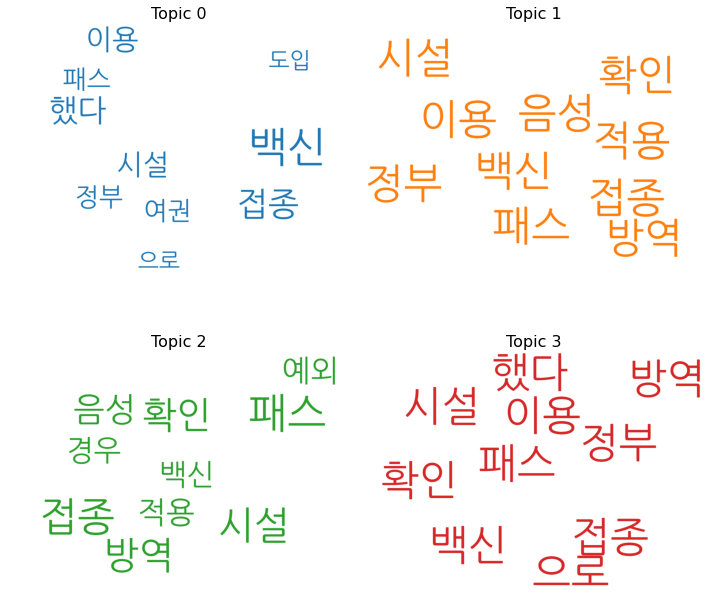

In [ ]:
# 토픽별 워드크라우딩
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
fontpath = '/content/NanumGothic.ttf'
cloud = WordCloud(background_color='white',
                  font_path=fontpath,
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48177 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_

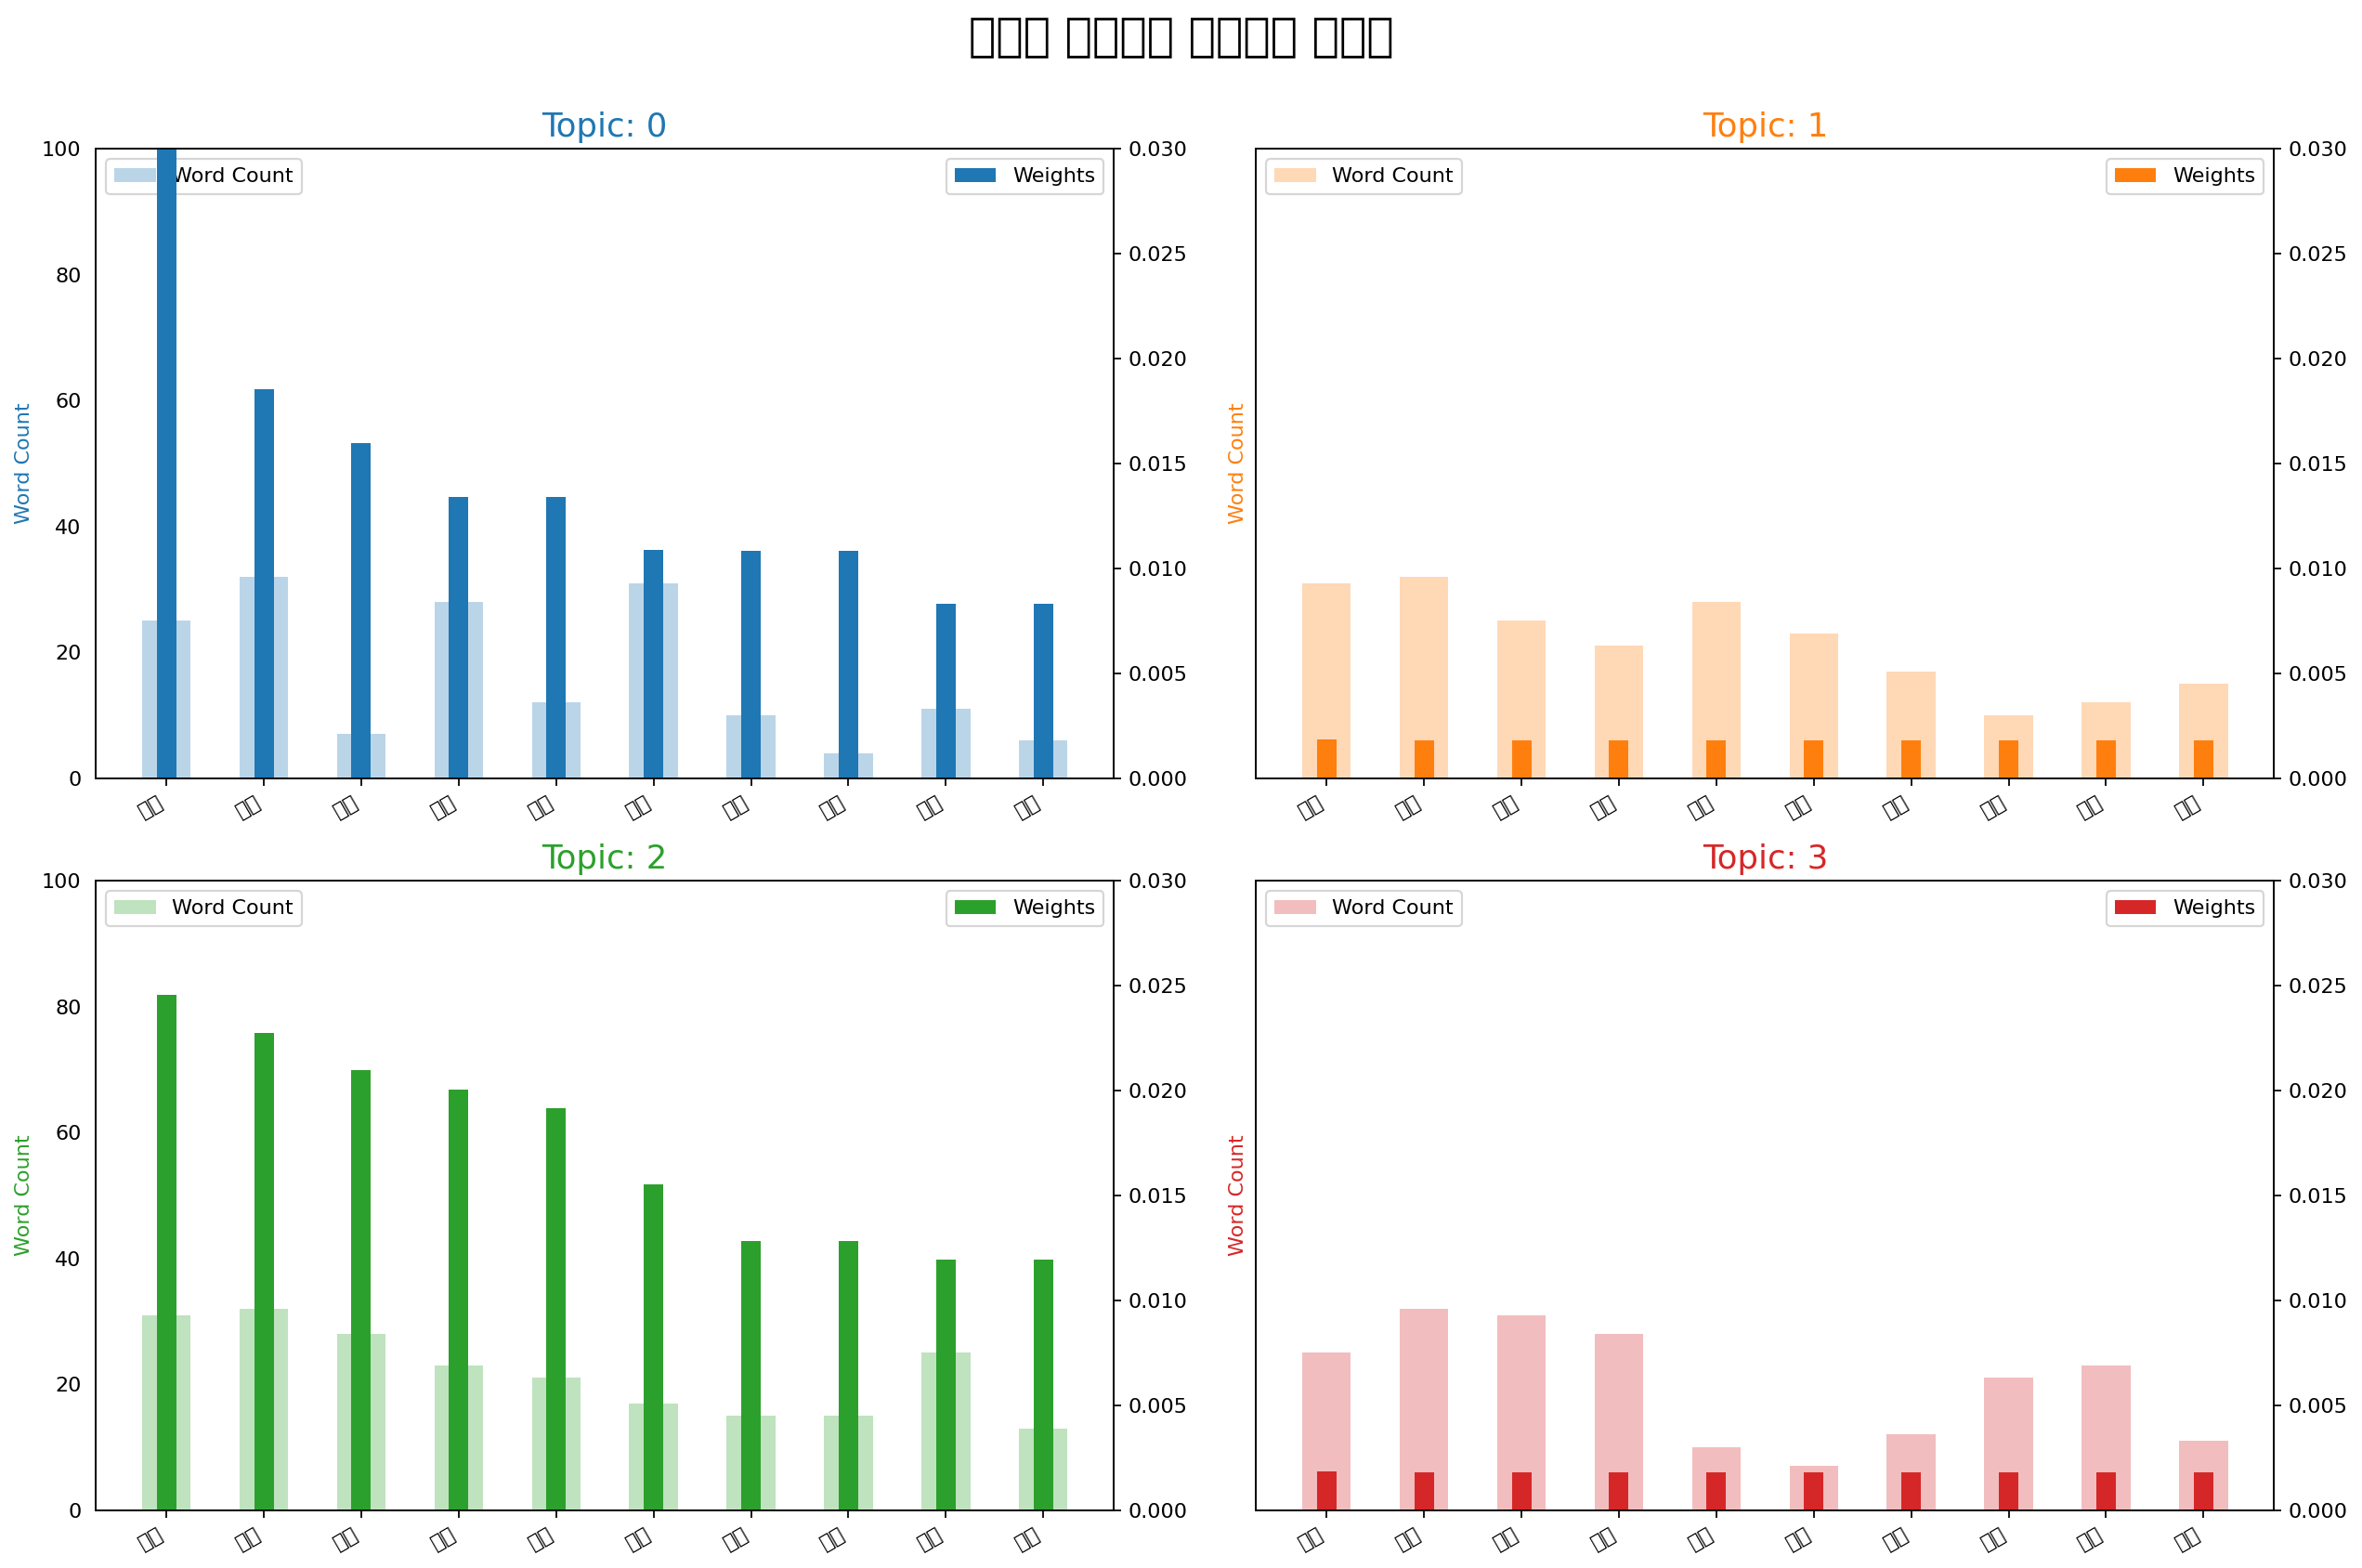

In [ ]:
# 토픽별 키워드의 빈도수와 중요도 시각화
from collections import Counter
import matplotlib.font_manager as fm

topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in tokens for w in w_list]
counter = Counter(data_flat)

# 주제별 토픽
out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')

# 토픽별 키워드의 빈도수와 중요도
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 100)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)
fig.suptitle('토픽별 키워드의 빈도수와 중요도', fontsize=22, y=1.05)
plt.show()

In [ ]:
!pip install pyLDAvis==2.1.2

In [ ]:
import pyLDAvis.gensim
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, g_corpus, g_dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  return pd.DataFrame({'Term': vocab[term_ix], \


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.109204 -0.016311       1        1  79.213478
0     -0.103432 -0.018184       2        1  20.623181
1     -0.002815  0.017204       3        1   0.081671
3     -0.002957  0.017292       4        1   0.081670, topic_info=    Term       Freq      Total Category  logprob  loglift
65    백신  19.000000  19.000000  Default  30.0000  30.0000
171   확인  18.000000  18.000000  Default  29.0000  29.0000
111   음성  15.000000  15.000000  Default  28.0000  28.0000
251   경우  11.000000  11.000000  Default  27.0000  27.0000
122  입니다  10.000000  10.000000  Default  26.0000  26.0000
..   ...        ...        ...      ...      ...      ...
417   하지   0.001797   4.288545   Topic4  -6.3199  -0.6676
107   위험   0.001796   6.491073   Topic4  -6.3200  -1.0822
140   조치   0.001796   3.415898   Topic4  -6.3202  -0.4404
186   대상   0.001796   9.982382   Topic4  -6.3202  -1.5128
205   증명   0.001796   6.263259   Topic4  -6.3203  -1.0468

[252 rows x 6 columns], token_table=      Topic      Freq Term
term                      
433       2  0.973783  25일
229       1  1.053488   ?-
232       1  0.950553  PCR
9         1  0.889853   감염
436       2  0.973858   강도
...     ...       ...  ...
554       2  0.973848   호주
171       1  1.015602   확인
556       2  0.973882   환영
172       1  0.927653   회복
172       2  0.185531   회복

[152 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 4])